In [2]:
# Check if the Hann reproject pickles are ok (SVD zernikes and no straylight corr.)

# Also check how the PSF applied ones look

In [3]:
import _pickle as cPickle
import json
import sunpy
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

from datetime import datetime as dt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m %H:%M')

/scratch/slam/sinjan/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
hmisize=2.42407e-6*1.496e8*1e5

In [5]:
dates = [12,13,14,15,16,17]

num_files = int(len(os.listdir('/scratch/slam/sinjan/arlongterm_hmi/blos_45/')))

In [6]:
num_files

129

In [7]:
hrt_arr = np.zeros((4102,4102,num_files))
hmi_arr = np.zeros((4102,4102,num_files))

In [30]:
def get_hrt_hmi_arr_from_pickles(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '', hmi_suffix = '', year = '2023'):
    start = 0
    dates = [12,13,14,15,16,17]
    num_files = 129

    hrt_arr = np.zeros((4102,4102,num_files))
    hmi_arr = np.zeros((4102,4102,num_files))
    
    for i in dates:
        if i == 17:
            endhour = '11'
            endmin = '02'
            endday = 17
        else:
            endhour = '00'
            endmin = '00'
            endday = i+1
        with open(folder+f"HRTs_{hrt_series}_remapped_on_HMI_{year}10{i}T000000_{year}10{endday}T{endhour}{endmin}00{hrt_psf}.pickle{hrt_suffix}", "rb") as input_file:
            hrt_tmps = cPickle.load(input_file)
        
        with open(folder+f"HMIs_{hmi_series}_{year}10{i}T000000_{year}10{endday}T{endhour}{endmin}00.pickle{hmi_suffix}", "rb") as input_file:
            hmi_tmps = cPickle.load(input_file)
            
        for i,smap in enumerate(hrt_tmps):
            hrt_arr[:,:,start+i] = smap.data
    
        for i,smap in enumerate(hmi_tmps): #could zip together the two for loops, but need iterable
            nans=np.isnan(hrt_arr[:,:,start+i])
            tmp = smap.data
            tmp[nans] = np.nan
            hmi_arr[:,:,start+i] = tmp
            
        start += len(hrt_tmps)

    return hrt_arr, hmi_arr

In [13]:
start = 0

for i in dates:
    if i == 17:
        endhour = '11'
        endmin = '02'
        endday = 17
    else:
        endhour = '00'
        endmin = '00'
        endday = i+1
    with open(f"/data/slam/sinjan/arlongterm_pickles_hann/HRTs_blos_remapped_on_HMI_2310{i}T000000_2310{endday}T{endhour}{endmin}00_hmipsf_False.pickle", "rb") as input_file:
        hrt_tmps = cPickle.load(input_file)
    
    with open(f"/data/slam/sinjan/arlongterm_pickles_hann/HMIs_m_45s_2310{i}T000000_2310{endday}T{endhour}{endmin}00.pickle", "rb") as input_file:
        hmi_tmps = cPickle.load(input_file)
        
    for i,smap in enumerate(hrt_tmps):
        hrt_arr[:,:,start+i] = smap.data

    for i,smap in enumerate(hmi_tmps): #could zip together the two for loops, but need iterable
        nans=np.isnan(hrt_arr[:,:,start+i])
        tmp = smap.data
        tmp[nans] = np.nan
        hmi_arr[:,:,start+i] = tmp
        
    start += len(hrt_tmps)

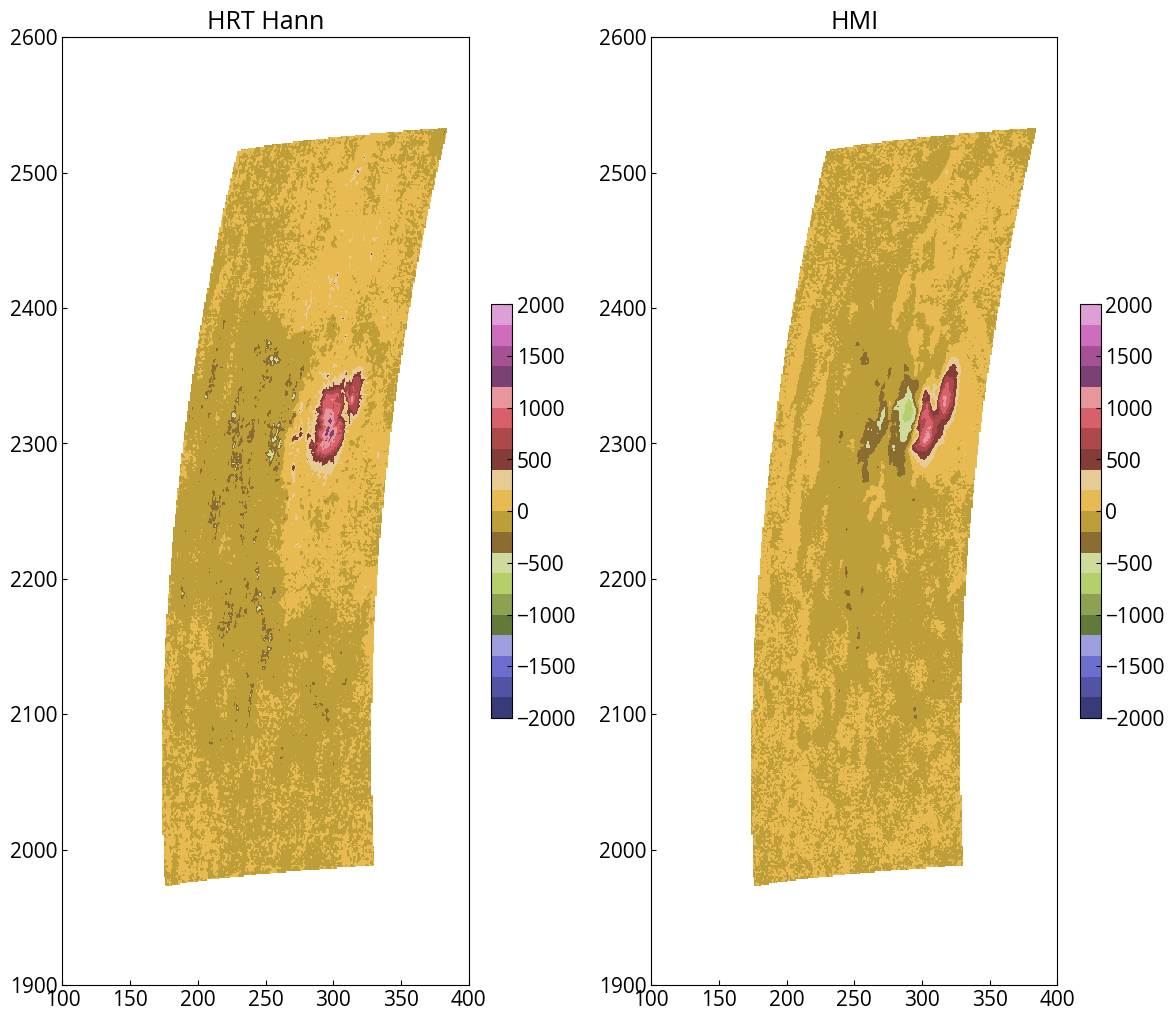

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(hrt_arr[:,:,0], origin="lower", cmap='tab20b',vmin=-2000,vmax=2000)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HRT Hann')

plt.subplot(122)
plt.imshow(hmi_arr[:,:,0], origin="lower", cmap='tab20b',vmin=-2000,vmax=2000)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HMI')
plt.tight_layout()
plt.show()

In [18]:
start = 0

hrt_arr_psf = np.zeros((4102,4102,num_files))
hmi_arr_psf = np.zeros((4102,4102,num_files))

for i in dates:
    if i == 17:
        endhour = '11'
        endmin = '02'
        endday = 17
    else:
        endhour = '00'
        endmin = '00'
        endday = i+1
    with open(f"/data/slam/sinjan/arlongterm_pickles_hann/HRTs_blos_remapped_on_HMI_202310{i}T000000_202310{endday}T{endhour}{endmin}00_hmipsf_True.pickle", "rb") as input_file:
        hrt_tmps = cPickle.load(input_file)
    
    with open(f"/data/slam/sinjan/arlongterm_pickles_hann/HMIs_m_45s_202310{i}T000000_202310{endday}T{endhour}{endmin}00.pickle", "rb") as input_file:
        hmi_tmps = cPickle.load(input_file)
        
    for i,smap in enumerate(hrt_tmps):
        hrt_arr_psf[:,:,start+i] = smap.data

    for i,smap in enumerate(hmi_tmps): #could zip together the two for loops, but need iterable
        nans=np.isnan(hrt_arr_psf[:,:,start+i])
        tmp = smap.data
        tmp[nans] = np.nan
        hmi_arr_psf[:,:,start+i] = tmp
        
    start += len(hrt_tmps)

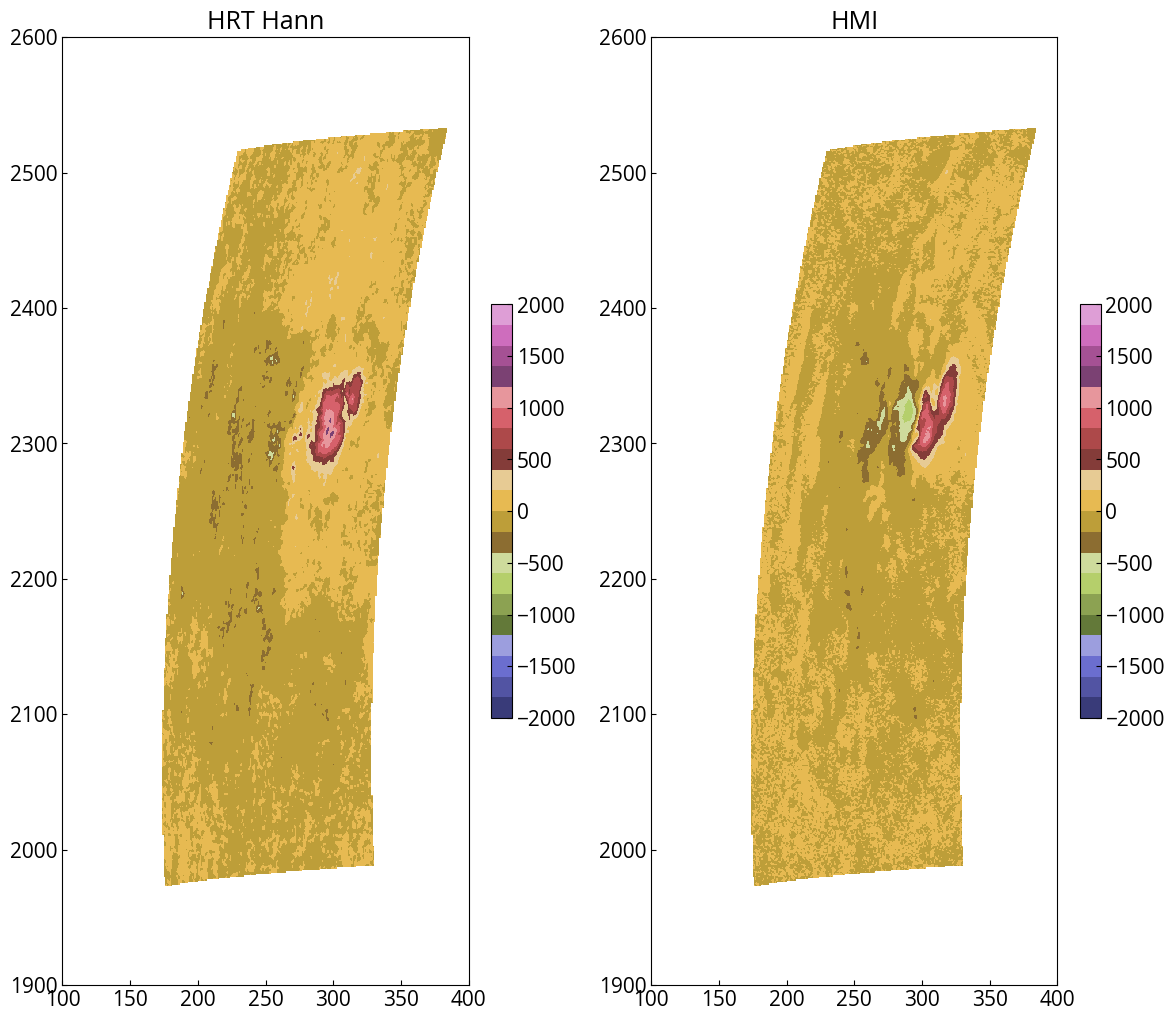

In [25]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(hrt_arr_psf[:,:,0], origin="lower", cmap='tab20b',vmin=-2000,vmax=2000)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HRT Hann')

plt.subplot(122)
plt.imshow(hmi_arr_psf[:,:,0], origin="lower", cmap='tab20b',vmin=-2000,vmax=2000)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HMI')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Blos HRT Hann PSF - HRT Hann')

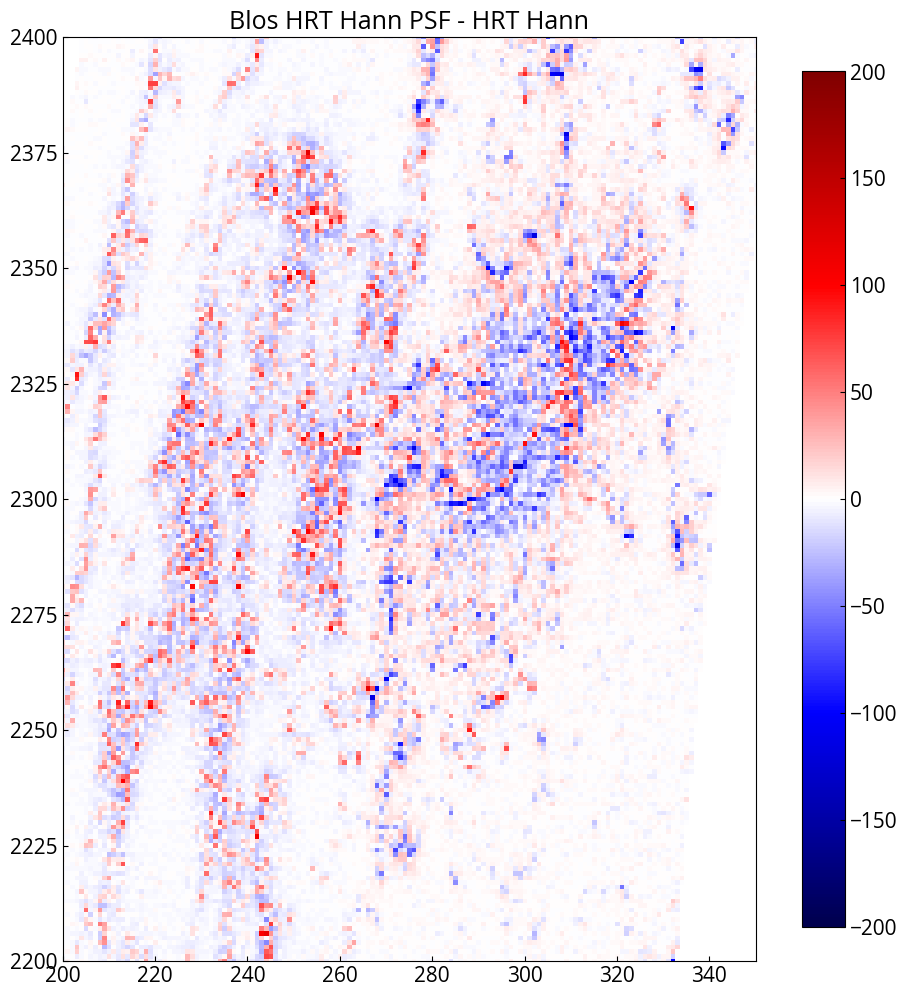

In [35]:
plt.figure(figsize=(12,12))
plt.imshow(hrt_arr_psf[:,:,0]-hrt_arr[:,:,0], origin="lower", cmap='seismic',vmin=-200,vmax=200)
plt.xlim(200,350)
plt.ylim(2200,2400)
plt.colorbar(fraction=0.046)
plt.title('Blos HRT Hann PSF - HRT Hann')

In [20]:
#check Ic_45s, with and without psf applied
folder = '/data/slam/sinjan/arlongterm_pickles_hann/'
hrt_series = 'icnt'
hmi_series = 'ic_45s'
hrt_psf = '_hmipsf_False'
hrt_ic_arr,hmi_ic_arr =  get_hrt_hmi_arr_from_pickles(folder, hrt_series, hmi_series, hrt_psf, suffix = '', year = '2023')

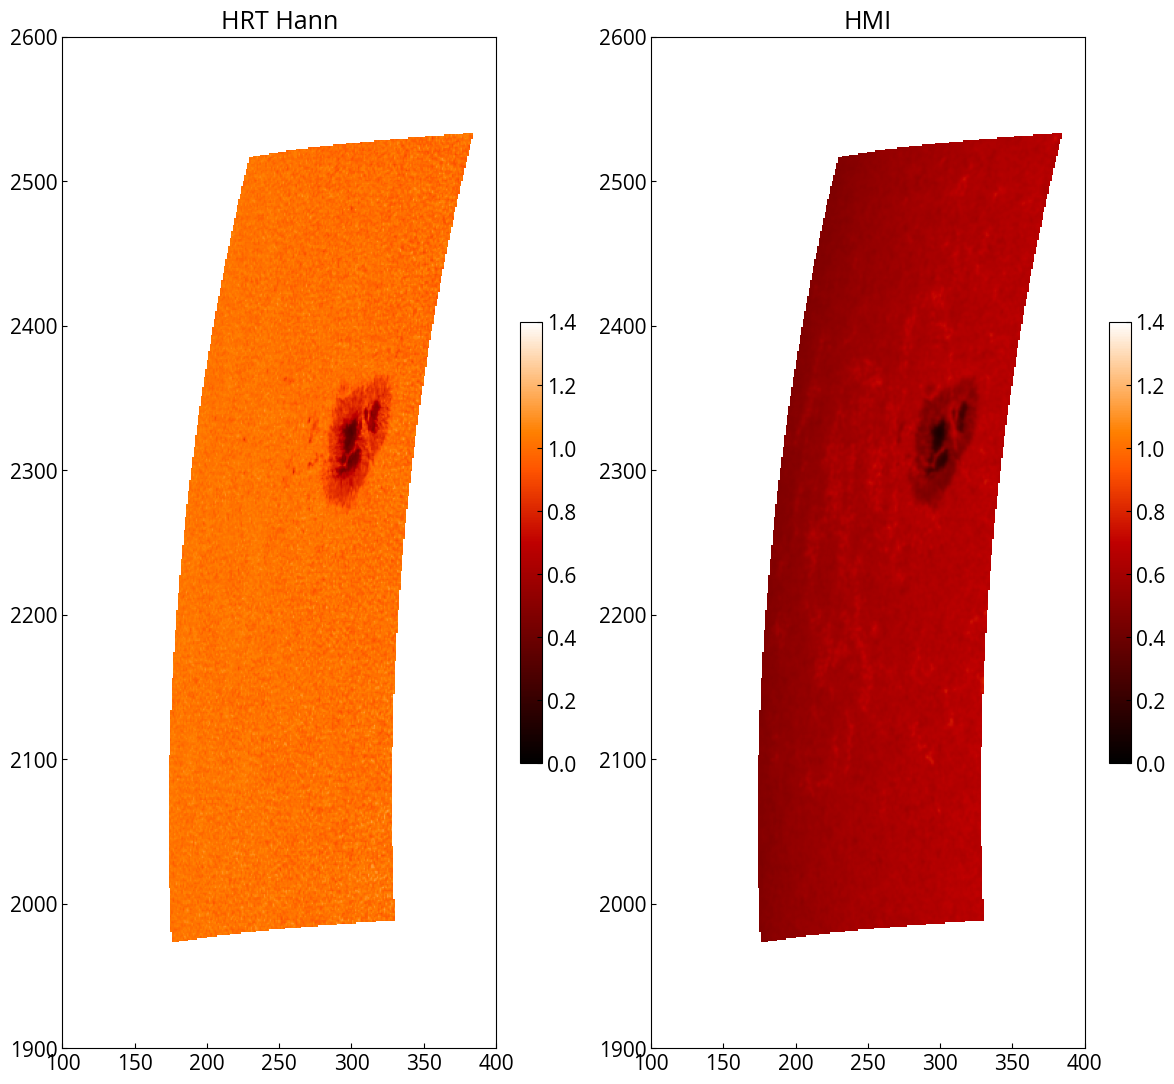

In [28]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(hrt_ic_arr[:,:,0], origin="lower", cmap='gist_heat',vmin=0,vmax=1.4)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HRT Hann')

plt.subplot(122)
plt.imshow(hmi_ic_arr[:,:,0]/50000, origin="lower", cmap='gist_heat',vmin=0,vmax=1.4)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HMI')
plt.tight_layout()
plt.show()

In [31]:
#check Ic_45s, with and without psf applied
folder = '/data/slam/sinjan/arlongterm_pickles_hann/'
hrt_series = 'icnt'
hmi_series = 'ic_45s'
hrt_psf = '_hmipsf_True'
hrt_ic_arr_psf,hmi_ic_arr_psf =  get_hrt_hmi_arr_from_pickles(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '_NEW', hmi_suffix = '', year = '2023')

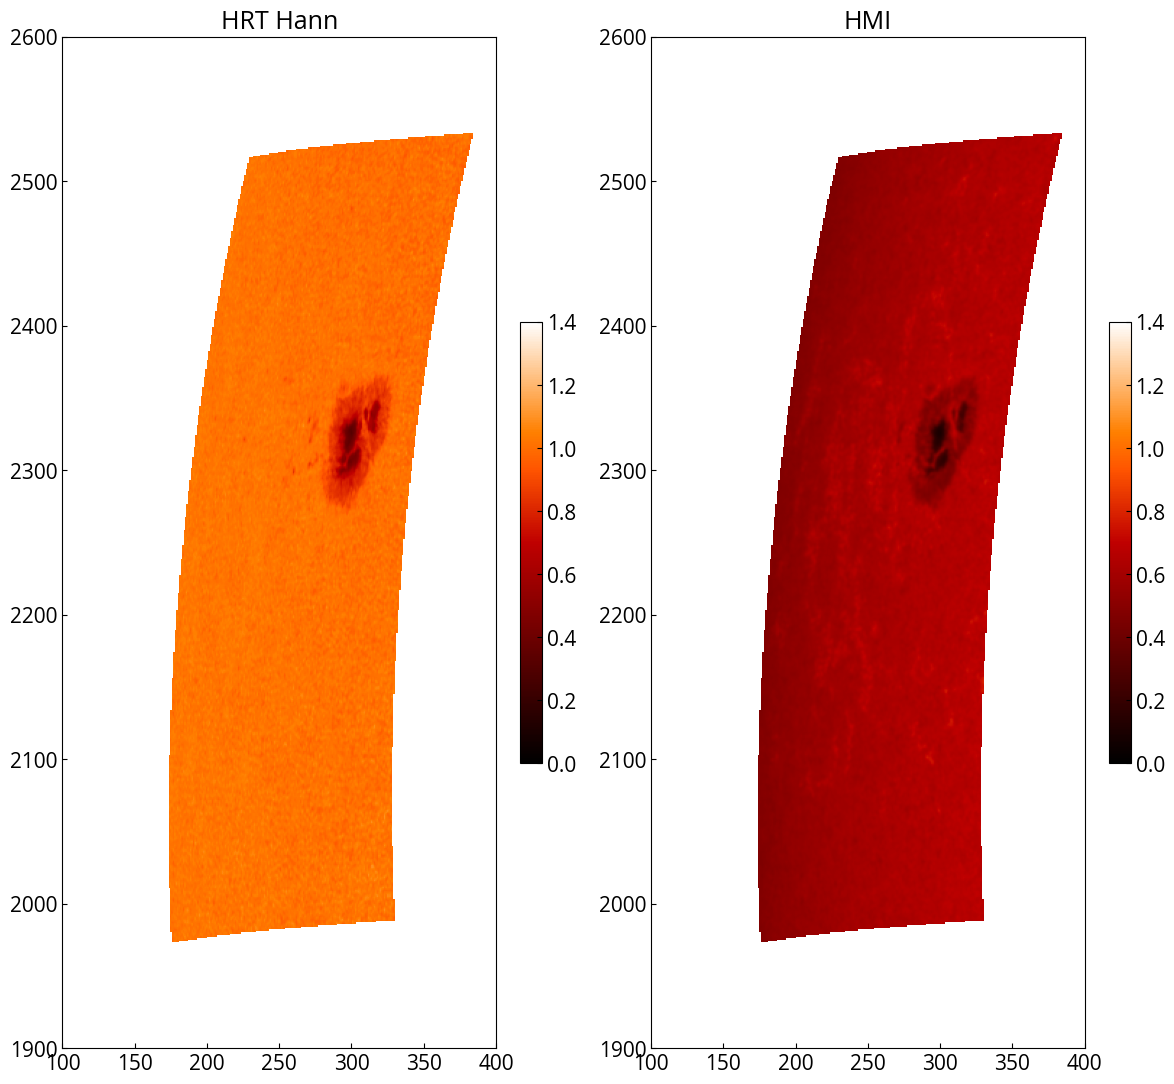

In [32]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(hrt_ic_arr_psf[:,:,0], origin="lower", cmap='gist_heat',vmin=0,vmax=1.4)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HRT Hann')

plt.subplot(122)
plt.imshow(hmi_ic_arr_psf[:,:,0]/50000, origin="lower", cmap='gist_heat',vmin=0,vmax=1.4)
plt.xlim(100,400)
plt.ylim(1900,2600)
plt.colorbar(fraction=0.046)
plt.title('HMI')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'IC HRT Hann PSF - HRT Hann')

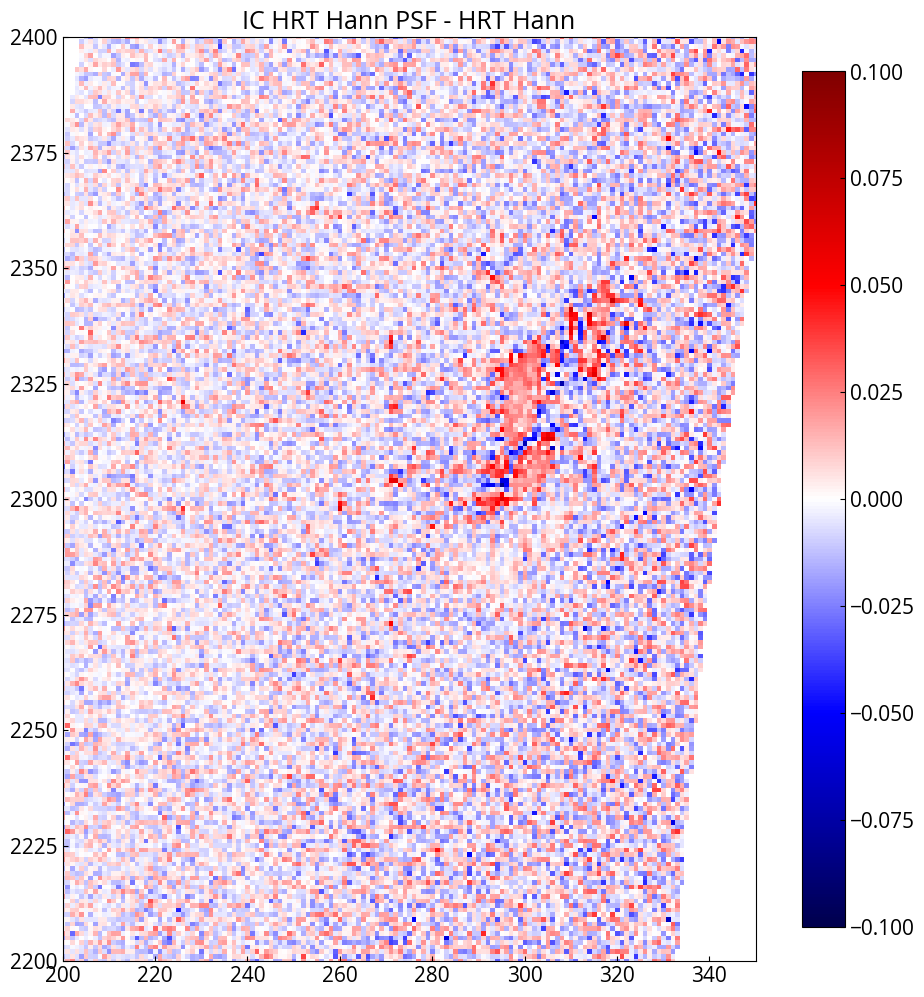

In [36]:
plt.figure(figsize=(12,12))
plt.imshow(hrt_ic_arr_psf[:,:,0]-hrt_ic_arr[:,:,0], origin="lower", cmap='seismic',vmin=-0.1,vmax=0.1)
plt.xlim(200,350)
plt.ylim(2200,2400)
plt.colorbar(fraction=0.046)
plt.title('IC HRT Hann PSF - HRT Hann')